# Introduction #

In the tutorial we learned about the building blocks of neural networks: *linear units*. We saw that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). In this exercise, you'll build a linear model and get some practice working with models in Keras.

Before you get started, run the code cell below to set everything up.

In [1]:
## Nothing here!

The *Red Wine Quality* dataset consists of physiochemical measurements from about 1600 Portuguese red wines.  Also included is a quality rating for each wine from blind taste-tests. 

First, run the next cell to display the first few rows of this dataset.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

red_wine = pd.read_csv('../data/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
red_wine.groupby('quality').sum().T

quality,3,4,5,6,7,8
fixed acidity,83.60000,412.30000,5561.90000,5325.500000,1765.600000,154.20000
volatile acidity,8.84500,36.78000,392.96500,317.395000,80.380000,7.62000
citric acid,1.71000,9.23000,165.95000,174.700000,74.660000,7.04000
residual sugar,26.35000,142.80000,1722.15000,1580.450000,541.400000,46.40000
chlorides,1.22500,4.80600,63.15300,54.202000,15.241000,1.23200
free sulfur dioxide,110.00000,650.00000,11566.00000,10024.000000,2795.000000,239.00000
total sulfur dioxide,249.00000,1921.00000,38486.00000,26075.000000,6969.000000,602.00000
density,9.97464,52.81675,679.02757,635.840410,198.224750,17.91382
pH,33.98000,179.22000,2250.67000,2116.930000,654.860000,58.81000
sulphates,5.70000,31.61000,422.88000,430.860000,147.510000,13.82000


<AxesSubplot:>

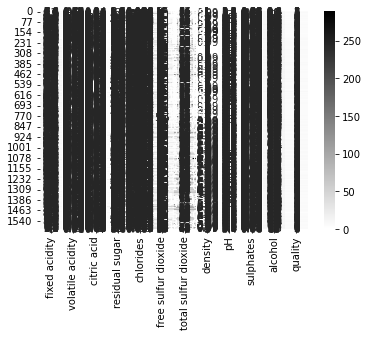

In [4]:
sns.heatmap(red_wine, cmap=plt.cm.binary, annot=True)

You can get the number of rows and columns of a dataframe (or a Numpy array) with the `shape` attribute.

In [ ]:
red_wine.shape # (rows, columns)

(1599, 12)

# 1) Input shape #

How well can we predict a wine's perceived quality from the physiochemical measurements?  

The target is `'quality'`, and the remaining columns are the features.  How would you set the `input_shape` parameter for a Keras model on this task?

In [5]:
# YOUR CODE HERE
input_shape = [11]

# 2) Define a linear model

Now define a linear model appropriate for this task. Pay attention to how many inputs and outputs the model should have.

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE
model = keras.models.Sequential()
model.add(layers.Dense(1, activation='softmax', input_shape=input_shape))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


# 3) Look at the weights

Internally, Keras represents the weights of a neural network with **tensors**. Tensors are basically TensorFlow's version of a Numpy array with a few differences that make them better suited to deep learning. One of the most important is that tensors are compatible with [GPU](https://www.kaggle.com/docs/efficient-gpu-usage) and [TPU](https://www.kaggle.com/docs/tpu)) accelerators. TPUs, in fact, are designed specifically for tensor computations.

A model's weights are kept in its `weights` attribute as a list of tensors. Get the weights of the model you defined above. (If you want, you could display the weights with something like: `print("Weights\n{}\n\nBias\n{}".format(w, b))`).

In [14]:
w, b = model.weights

In [15]:
print("Weights\n{}\nBias\n{}".format( w , b))

Weights
<tf.Variable 'dense_1/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.284822  ],
       [-0.26548958],
       [-0.45419535],
       [ 0.3271671 ],
       [ 0.45187908],
       [-0.5163779 ],
       [ 0.08724028],
       [-0.39726776],
       [-0.4011316 ],
       [ 0.6361607 ],
       [-0.4914395 ]], dtype=float32)>
Bias
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


(By the way, Keras represents weights as tensors, but also uses tensors to represent data. When you set the `input_shape` argument, you are telling Keras the dimensions of the array it should expect for each example in the training data. Setting `input_shape=[3]` would create a network accepting vectors of length 3, like `[0.2, 0.4, 0.6]`.)
 

# Optional: Plot the output of an untrained linear model
 
The kinds of problems we'll work on through Lesson 5 will be *regression* problems, where the goal is to predict some numeric target. Regression problems are like "curve-fitting" problems: we're trying to find a curve that best fits the data. Let's take a look at the "curve" produced by a linear model. (You've probably guessed that it's a line!)
 
We mentioned that before training a model's weights are set randomly. Run the cell below a few times to see the different lines produced with a random initialization. (There's no coding for this exercise -- it's just a demonstration.)

2022-01-04 21:25:54.095388: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-04 21:25:54.116945: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2400005000 Hz


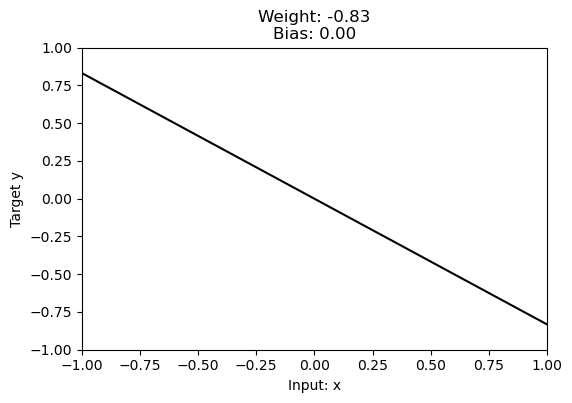

In [19]:
model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()